In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pytesseract
pytesseract.pytesseract.tesseract_cmd= 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
import re
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Opens the Video file
video_path= r'C:\Users\hritv\Desktop\AKXA Tech\ZACL __ NPKpredictNEW (1).mp4'
cap= cv2.VideoCapture(video_path)
i=1
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    if i%30 == 0:
        cv2.imwrite(r'C:\Users\hritv\Desktop\AKXA Tech\Frames\frame%d.jpg'%i,frame)
    i+=1

cap.release()
cv2.destroyAllWindows()

In [6]:
img= cv2.imread(r'C:\Users\hritv\Desktop\AKXA Tech\Frames\frame30.jpg')
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
scale= 0.5
circles=[]
counter=0
counter2=0
point1= []
point2= []
myPoints= []
myColor= []

def mousePoints(event,x,y,flags,params):
    global counter, point1, point2, counter2, circles, myColor
    if event == cv2.EVENT_LBUTTONDOWN:
        if counter == 0:
            point1 = int(x//scale), int(y//scale);
            counter+=1
            myColor = (random.randint(0,2)*200,random.randint(0,2)*200,random.randint(0,2)*200)
        elif counter == 1:
            point2 = int(x//scale), int(y//scale);
            Type= input('Enter Type')
            name= input('Enter name')
            myPoints.append([point1,point2,Type,name])
            counter= 0
        circles.append([x,y,myColor])
        counter2+=1
img1= cv2.imread(r'C:\Users\hritv\Desktop\AKXA Tech\Frames\frame30.jpg')
img1= cv2.resize(img1,(0,0),None,scale,scale)

while True:
    for x,y,color in circles:
        cv2.circle(img1,(x,y),3,color,cv2.FILLED)
    cv2.imshow('org img',img1)
    cv2.setMouseCallback('org img', mousePoints)
    if cv2.waitKey(1) & 0xFF == 27:
        print(myPoints)
        break

Enter Typetext
Enter nameN %
Enter Typetext
Enter nameP %
Enter Typetext
Enter nameK %
[[(764, 254), (836, 278), 'text', 'N %'], [(764, 310), (832, 334), 'text', 'P %'], [(764, 366), (834, 390), 'text', 'K %']]


In [12]:
frames= sorted(os.listdir(r'C:\Users\hritv\Desktop\AKXA Tech\Frames'),key=lambda x: int(x[5:][:-4]))
N=0
P=0
K=0
Data= pd.DataFrame(columns= ['N %','P %','K %'])
for i in frames:    
    roi= [[(760, 252), (836, 278), 'text', 'N %'], 
          [(764, 310), (832, 334), 'text', 'P %'], 
          [(762, 364), (838, 390), 'text', 'K %']]

    img= cv2.imread(r'C:\Users\hritv\Desktop\AKXA Tech\Frames\{}'.format(i))
    imgShow= img.copy()
    imgMask= np.zeros_like(imgShow)

    for x,r in enumerate(roi):
        cv2.rectangle(imgMask, (r[0][0],r[0][1]), (r[1][0],r[1][1]), (0,255,0), cv2.FILLED)
        imgShow= cv2.addWeighted(imgShow, 0.99, imgMask, 0.1,0)
        imgCrop= img[r[0][1]:r[1][1], r[0][0]:r[1][0]]
        if x == 0:
            gray = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
            thresh1 = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            dist = cv2.distanceTransform(thresh1, cv2.DIST_L2, 5)
            dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
            dist = (dist * 255).astype("uint8")
            thresh2 = cv2.threshold(dist, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            N= re.split('\n| ',pytesseract.image_to_string(thresh2, config= '--psm 7'))[0]
        elif x== 1:
            gray = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
            thresh1 = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            dist = cv2.distanceTransform(thresh1, cv2.DIST_L2, 5)
            dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
            dist = (dist * 255).astype("uint8")
            thresh2 = cv2.threshold(dist, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            P= re.split('\n| ',pytesseract.image_to_string(thresh2, config= '--psm 7'))[0]
        else:
            K= re.split('\n',pytesseract.image_to_string(imgCrop))[0]
            Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
    if (float(N) < 0.95*12 or float(N) > 1.05*12) or (float(P) < 0.95*24.5 or float(P) > 1.05*24.5) or (float(K) < 0.95*5 or float(K) > 1.05*5):
        print('STOP!, Threshold value crossed.')
        break
Data

C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  D

C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  D

C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  D

C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data= Data.append({'N %':N,'P %':P,'K %':K}, ignore_index= True)
C:\Users\hritv\AppData\Local\Temp\ipykernel_34980\87008424.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  D

,N %,P %,K %
0,11.9,245,
1,11.9,24.6,
2,11.9,24.6,
3,11.9,24.6,
4,11.9,24.6,05.7
...,...,...,...
97,12.6,25.2,05.4
98,12.6,25.2,05.4
99,12.6,25.2,05.4
100,12.6,25.2,05.4


Text(0.5, 1.0, 'K %')

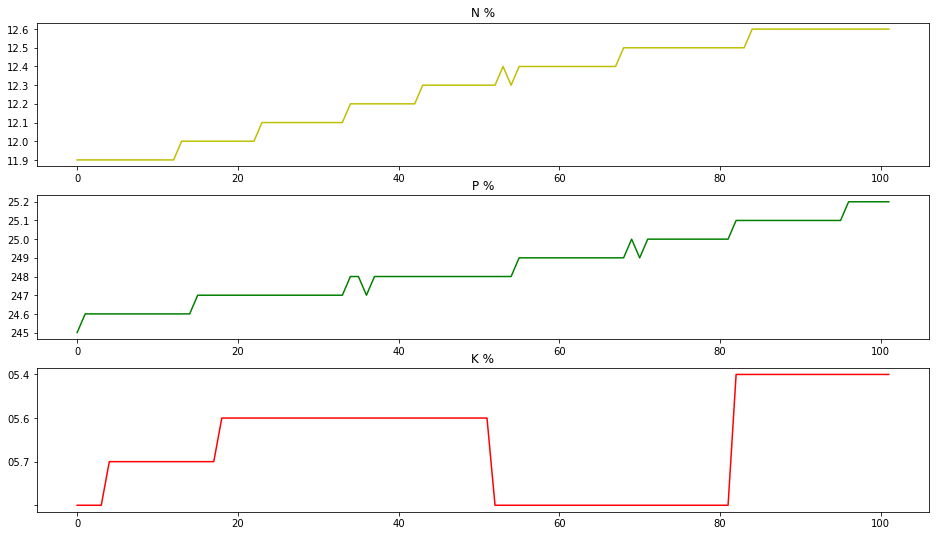

In [15]:
fig,ax = plt.subplots(3,figsize=(16,9))
# fig.suptitle('Vertically stacked subplots')
# X= range(len(Data))
ax[0].plot(Data['N %'], color='y')
ax[0].set_title('N %')
ax[1].plot(Data['P %'], color='g')
ax[1].set_title('P %')
ax[2].plot(Data['K %'], color='r')
ax[2].set_title('K %')